In [1]:
from google.colab import files


uploaded = files.upload()


Saving tweets.csv to tweets.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
plt.rcParams["figure.figsize"] = (15,7)
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
dataset = pd.read_csv("tweets.csv",parse_dates=['time'])

In [4]:
u1 = input('Enter username 1:- ')

Enter username 1:- GunsandCoffee70


In [5]:
u2=input('Enter username 2:- ')

Enter username 2:- YazeedDhardaa25


In [6]:
def extract_hash_tags(s):
                   return list(part[1:] for part in s.split() if part.startswith('#'))

In [7]:
list1=[]
list2=[]
for user, tweet in zip(dataset['username'], dataset['tweets']):
  if user==u1:
    list1=extract_hash_tags(tweet)
    for each_element in list1:
      if each_element not in list2:
         list2.append(each_element)  


In [8]:
print(list2)

['JN', 'سبيل_النجاة', 'IS']


In [9]:
list3=[]
list4=[]
for user, tweet in zip(dataset['username'], dataset['tweets']):
  if user==u2:
    list3=extract_hash_tags(tweet)
    for each_element in list3:
      if each_element not in list4:
        list4.append(each_element)

In [10]:
print(list4)

['IS', 'Syria', 'Aleppo', 'Raqqa', 'IslamicState', 'Damascus', 'Sinai', 'Egypt|ian', 'Syria:', 'Palmyra', 'Alkhayr', 'DeirEzzor', 'Mosul.', 'Drones', 'ISIS', 'Iraq|i', 'IS|#ISIS', 'Turkey', 'PKK', 'TwitterKurds', "Washington's", 'HDP', 'Ankara', 'Syria..', 'SalahEdDeen.', 'Facebook', 'Norway', 'Dabiq', 'BreakingNews', 'USA', 'أمريكا_تحت_الإختراق', "Russia'n", "Syria's", 'Homs', 'JN', 'AQ', 'Ahrar', 'Syria.', 'Russia|n', 'Mecca']


In [12]:
list5=set(list2)&set(list4)
common_hashtags=len(list5)
if common_hashtags>5:
  print("{} has same twitter activity as {} because they have {} common hashtags: ".format(u1,u2,common_hashtags))
else:
  print("{} do not have same twitter activity as {} because they have only {} common hashtags: ".format(u1,u2,common_hashtags))

GunsandCoffee70 do not have same twitter activity as YazeedDhardaa25 because they have only 2 common hashtags: 


In [13]:
unique_names=list()
for user in dataset['username']:
  if user not in unique_names:
    unique_names.append(user)

In [14]:
print(unique_names)

['GunsandCoffee70', 'AbuLaythAlHindi', 'YazeedDhardaa25', 'abubakerdimshqi', 'BaqiyaIs', 'WhiteCat_7', 'al_nusra', 'warreporter2', 'abuhanzalah10', 'Bajwa47online', 'pleaoftheummah', 'AsimAbuMerjem', 'abdlrhmn15', 'NaseemAhmed50', 'MaghrabiArabi', 'CXaafada2', 'BilalIbnRabah1', 'maisaraghereeb', 'Abu_Azzzam25', 'darulhijrateyni', 'JoinISNation102', '1Dawlah_III', 'abuhumayra4', 'fahadslay614', 'ismailmahsud', '06230550_IS', 'bintraveller', 'Alwala_bara', 'RamiAlLolah', 'mobi_ayubi', 'QassamiMarwan', 'Al_Battar_Engl', 'Witness_alHaqq', 'warrnews', 'AbuNaseeha_03', 'ansarakhilafa', '_IshfaqAhmad', 'almuhajirun9', 'Uncle_SamCoco', 'MaghrebiQM', 'Fidaee_Fulaani', 'Battar_English', 'AbdusMujahid149', '1515Ummah', 'newerajihadi61', 'mustaklash', 'ManKhalfahum', 'grezz10', 'MhzBnt', 'FidaeeFulaani', 'WarReporter1', 'ks48a174031', 'dieinurage29__7', 'mustafaklash56', 'baaqiya_01', 'lNSlDEWAR', 'moustiklash', '`````````````````````````````````````````````````````````````````````````````````````

In [15]:
all_hashtags=[]
for tweet in dataset['tweets']:
  temp_list=extract_hash_tags(tweet)
  for i in temp_list:
      all_hashtags.append(i)

In [16]:
print(all_hashtags)

['JN', 'JN', 'سبيل_النجاة', 'JN', 'IS', 'دولة_الخلافة', 'BREAKING', 'CONFIRMED', 'IS', 'Dawlah', 'cubs', 'IS', 'Syria', 'Aleppo', 'Raqqa', 'ولاية_دمشق', 'المال', 'بيجي', 'الخلافة', 'الخلافة', 'Mojahdin', 'Saudi', 'IS', 'Doma', 'ناصر_الفهد', 'دمشق', 'WilayatAlJazirah', 'AlShabaab', 'AMISOM', 'UPDF', 'IslamicState', 'Sinai', 'IS', 'WilayatBarqah', 'Libya', 'Assad', 'dayniile', 'Lego', 'Jannale', 'Yurkud', 'Somalia', 'ولاية_سيناء', 'IslamicState', 'Damascus', 'WilayatAlFallujah', 'Syria', 'WilayatAlFurat', 'JN', 'IS', 'Sinai', 'Egypt|ian', 'IS', 'Uighurs', 'Amaq_News:', 'IS', 'al_qadam', 'Damascus.', 'Syria:', 'Palmyra', 'IslamicState', 'IS', 'Katyusha', 'Peshmerga', 'Hawija', 'IS', 'Ramadi', 'camp', 'ISIS', 'Fallujah,', 'Iraq.', 'PT', 'UAE', 'Yemen', 'ولاية_حلب', 'دولة_الخلافة', 'ولاية_دمشق', 'IS', 'WilayatHims', 'Syria', 'يوتيوب✔', 'امریکہ', 'القاعدة', 'انصاراللہ', 'داعش', 'Marea', 'حمص', 'الدولة_الاسلامية', 'Turkey', 'Saudi', 'Yemeni', 'Alkhayr', 'DeirEzzor', 'Mosul.', 'IslamicState', 

In [17]:
unique_h=[]
unique_h=set(all_hashtags)
print(unique_h)

{'', 'هوليود_اليهود', 'يسألونك_عن_الإرهاب', 'Drones', 'Vienna', 'Baalbek..', 'Hajar', 'مطار_كويرس', 'بغداد', 'prayforpeace', 'US-Led', 'Allah,', 'أخبار_الخلافة', 'WarOnAlshabaab', 'Sukhnah', 'غرد_كأنك_تيس', 'Azaadi', 'France,', 'Kuweires', 'SAF', 'Gaza', 'Syria/', 'Damascus.', 'FACup', 'Devastates', 'Iran:', 'Salahudeen.', 'فيديو', 'ahraralsham', 'kuffars', 'الجزيرة', 'Haswah…', 'Azaz,', 'TerrorMonitor', 'Israel,', 'économie', 'Hamidiyyah', 'sheikhahmadjibril', 'Fallujah,', 'infoGeographic', 'دولة_الخلافه', 'decisive_storm', 'Israel’s', 'الغوطه_في_خطر', 'Attacking', 'Shawool', 'bulldozer', 'AMISOM', 'Endass_ad', 'al-Khan', "Putin's", 'Bahrain', 'TURKEY', 'Dagestan,', 'SaveCiggerates', 'health', 'Kampala', 'Billboard', 'Qamishlo', 'Hummer', 'Makhmoor', 'Tabaqah', 'Madkhalee', 'BurkinaFaso', 'DeirEzzor24', 'quoteoftheday', 'BrusselsAttacks', 'ذئابنا_المنفردة', 'نطالب_بنظريه_التطور_بالمناهج', 'Hamadiyyah.', 'أخبار_الآن', 'Kobane,', 'KOBANE', 'MUFC', 'FreeUmmLuqman', 'Zawahiri', "London's"

In [18]:
temp_list.clear()

In [19]:


freq={}
for item in all_hashtags:
  if (item in freq):
            freq[item] += 1
  else:
            freq[item] = 1

for key, value in freq.items():
        print ("% s : % d"%(key, value))
      

JN :  12
سبيل_النجاة :  1
IS :  652
دولة_الخلافة :  3
BREAKING :  87
CONFIRMED :  1
Dawlah :  1
cubs :  1
Syria :  1031
Aleppo :  268
Raqqa :  48
ولاية_دمشق :  3
المال :  1
بيجي :  12
الخلافة :  3
Mojahdin :  1
Saudi :  83
Doma :  1
ناصر_الفهد :  1
دمشق :  12
WilayatAlJazirah :  17
AlShabaab :  9
AMISOM :  4
UPDF :  1
IslamicState :  428
Sinai :  110
WilayatBarqah :  16
Libya :  101
Assad :  132
dayniile :  1
Lego :  1
Jannale :  1
Yurkud :  1
Somalia :  23
ولاية_سيناء :  1
Damascus :  86
WilayatAlFallujah :  23
WilayatAlFurat :  17
Egypt|ian :  14
Uighurs :  1
Amaq_News: :  1
al_qadam :  1
Damascus. :  12
Syria: :  34
Palmyra :  166
Katyusha :  3
Peshmerga :  36
Hawija :  9
Ramadi :  94
camp :  1
ISIS :  1476
Fallujah, :  5
Iraq. :  29
PT :  7
UAE :  8
Yemen :  30
ولاية_حلب :  4
WilayatHims :  22
يوتيوب✔ :  1
امریکہ :  1
القاعدة :  2
انصاراللہ :  1
داعش :  4
Marea :  3
حمص :  6
الدولة_الاسلامية :  3
Turkey :  196
Yemeni :  1
Alkhayr :  2
DeirEzzor :  72
Mosul. :  20
Drones :  1
Iraq|i

In [20]:
import itertools

In [21]:
sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True) #A lambda function can take any number of arguments, but can only have one expression.
temp_freq={}
count=0
# temp_freq=dict(itertools.islice(sort_orders.items(),5))
for key,value in sort_orders:
  if count<10:
      temp_freq[key]=value
      count=count+1


In [22]:
print(temp_freq)

{'ISIS': 1476, 'Syria': 1031, 'IS': 652, 'IslamicState': 428, 'Iraq': 377, 'AmaqAgency': 312, 'Aleppo': 268, 'BreakingNews': 243, 'USA': 208, 'Breaking': 202}


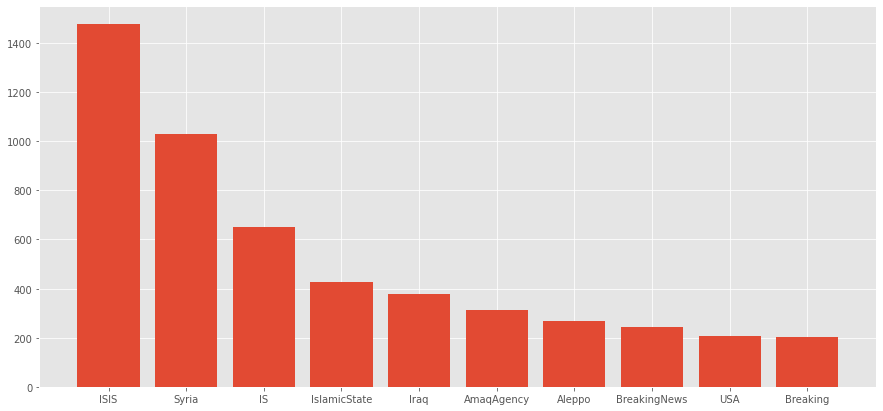

In [23]:
hashtags_x_axis=list(temp_freq.keys())
frequency_y_axis=list(temp_freq.values())
plt.bar(range(len(temp_freq)), frequency_y_axis, tick_label=hashtags_x_axis)
plt.show()

In [24]:
from wordcloud import WordCloud

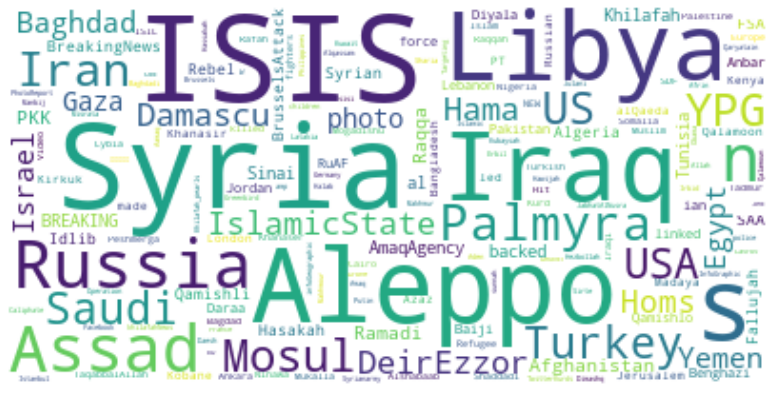

In [25]:
text = " ".join(cat for cat in unique_h)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
new_stopwords=["http","near","today","report","amp","-","#i ","fight","al",]
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)
print(stpwrd)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
def preprocess(tweet):

   
    tweet = re.sub(r'ENGLISH TRANSLATION:','',tweet)
    tweet = re.sub(r'[^A-Za-z# ]','',tweet)
    tweet=re.sub(r'http','',tweet)
    words = tweet.strip().split()
    hashtags = [word for word in words if re.match(r'#',word)!=None]
    words = [word.lower() for word in words if word not in hashtags]
    p_stem = PorterStemmer()
    words = [p_stem.stem(word.lower()) for word in words if word not in stpwrd]
    for hashtag in hashtags:
        hashtag = re.sub(r'#',hashtag,'')
        words_tag = []
        current_word = ''
        for a in hashtag:
            if a.isupper() and current_word!='':
                words_tag.append(current_word)
                current_word = ''+ a.lower()
            else:
                current_word = current_word + a.lower()
        words_tag.append(current_word)
        words.extend(words_tag)
    words = list(set(words))
    return words
   

In [28]:
 dataset['wordlist'] = [preprocess(tweet) for tweet in dataset['tweets']]

In [29]:
all_words = [word for wordlist in dataset['wordlist'] for word in wordlist]
length_all = len(all_words)
wordcount = dict([(word,all_words.count(word)) for word in set(all_words)])
print(length_all)

160078


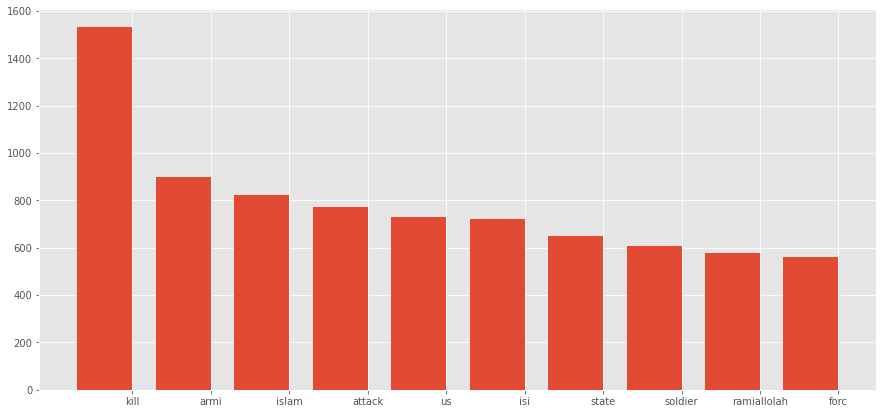

In [30]:
import operator
wordcount = sorted(wordcount.items(), key = operator.itemgetter(1))
wordcount.reverse()
wordcount = wordcount[2:] 
top10 = wordcount[:10]
top10_words = [word for (word,count) in top10]
top10_freq = [count for (word,count) in top10]
indexes = np.arange(len(top10_words))
width = 0.7
plt.figure(figsize=(15,7))
plt.bar(indexes, top10_freq, width)
plt.xticks(indexes + width/2 , top10_words)
plt.show()

In [31]:
import seaborn as sns
popularity = pd.DataFrame(dataset.groupby('username').followers.max())
small=500
mid=2000
big=10000
popularity['starhood']='none'
popularity.loc[popularity.followers<small,'starhood']='small'
popularity.loc[(popularity.followers>small) & (popularity.followers<mid),'starhood']='mid'
popularity.loc[(popularity.followers>mid) & (popularity.followers<big),'starhood']='large'
popularity.loc[(popularity.followers>big),'starhood']='very large'
dataset.reset_index(inplace=True)
dataset.set_index('username', inplace=True)
dataset['starhood']=popularity.starhood
dataset.reset_index(inplace=True)

print(dataset.groupby('starhood').username.unique().apply(lambda x: x.size))

starhood
large          6
mid           31
small         74
very large     1
Name: username, dtype: int64


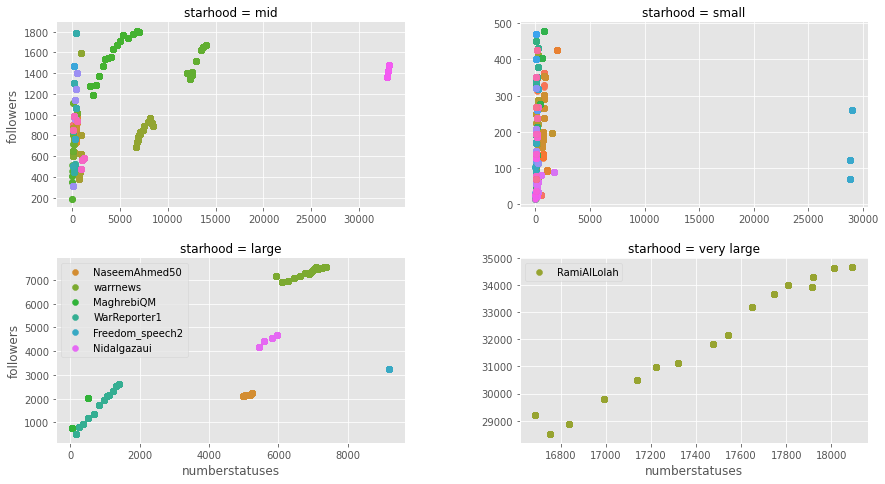

In [34]:
dataset[dataset.starhood=='large'].groupby('name').username.last()

dataset[dataset.starhood=='large'].groupby('name').username.last()

grid = sns.FacetGrid(data=dataset, col='starhood',col_wrap=2, hue='username', sharex=False, sharey=False)  #facetgrid is used to plot Small Multiples of Data Subsets
                                                                                                            #each subplot x- or y-axis will be independent.
grid=grid.map(plt.scatter,'numberstatuses','followers')
grid.axes[2].legend(loc='upper left')
grid.axes[3].legend(loc='upper left')
grid.fig.set_size_inches((14,7))

In [35]:
# analysis of the place from where the tweet was made
unique_locations = dataset['location'].unique()
unique_counts = dict([(loc,list(dataset['location']).count(loc)) for loc in unique_locations])
unique_counts = sorted(unique_counts.items(),key = operator.itemgetter(1))
unique_counts.reverse()
for (loc,counts) in unique_counts:
    print(loc,counts)

nan 5978
Read my blog 1475
world 1191
Worldwide contributions 998
Texas, USA 993
اُمتِ مُسلمہ ولایت کشمیر 709
United States 587
28th Street, Qamar Precint 426
Germany 397
Dunya 366
Male'. Maldives. 333
S.Wazirstan|Mahsud not a Wazir 318
Middle of Nowhere 303
dar al-kufr 285
Nowhere 234
Wilayah Kashmir 231
München, Deutschland 193
Bandar Seri Begawan, Negara Brunei Darussalam 182
Geneva, Switzerland 166
Ghurabā 159
Among The Muslims 152
Gaziantep, Turkey 146
Wilayat Hadramaut 134
Singaparna, Indonesia 100
أسير الدنيا 100
Antas, Bahia 99
Land of Allah 97
EU 97
Earth 96
Punch, Jammu And Kashmir 95
Among mushrikeen 93
Wilayah Twitter 89
Al-Battar Media Foundatiom 80
Lake City, GA 68
Guetto 58
I hate snitches 49
darl mushrequeen 47
Amsterdam, The Netherlands 45
خارج الخلافة 42
Don't need to know 40
England, United Kingdom 27
AP 25
سرت‎ Sirte 23
40+Suspension for the truth! 23
noway 15
Dar Al Kufr 14
Islamic State 14
yamin, yasār raqum ١٤ 10
Prison ( Darul Kufr ) 4
. 4


In [36]:
index = []
for i in range(len(dataset['tweets'])):
    if '@' in dataset['tweets'][i]:
        index.append(i)
        
With_mention = dataset.iloc[index,:].reset_index(drop=True)
With_mention['Tagged_User'] = With_mention['tweets'].apply(lambda x: re.findall(r'@([A-Za-z0-9_]+)',str(x)))
User = With_mention['username'].unique()
With_mention['Tagged_User_Co'] = With_mention['Tagged_User'].apply(lambda x: list(set(x).intersection(User)) )
With_mention['Co_length'] = With_mention['Tagged_User_Co'].apply(lambda x: len(x))

In [37]:
for i in range(len(With_mention['tweets'])):
    frame = With_mention.iloc[i,:]
    for j in range(len(frame['Tagged_User'])):
        tmp = pd.DataFrame({'User':[frame['username']],'Mentions':[frame['Tagged_User'][j]],'Time': [frame['time']],'User_numberstatuses':[frame['numberstatuses']],'User_followers':[frame['followers']],'Weight': [1]})
        if i==0 and j==0:
            Mention_net = tmp
        else:
            Mention_net = Mention_net.append(tmp, ignore_index=True)

In [38]:
Mention_net = Mention_net[Mention_net['User']!=Mention_net['Mentions']]

In [39]:
Mention_net = Mention_net.reset_index(drop=True)

In [40]:
Mention_net.head(5)

,User,Mentions,Time,User_numberstatuses,User_followers,Weight
0,GunsandCoffee70,KhalidMaghrebi,1/6/2015 22:17,49,640,1
1,GunsandCoffee70,seifulmaslul123,1/6/2015 22:17,49,640,1
2,GunsandCoffee70,CheerLeadUnited,1/6/2015 22:17,49,640,1
3,GunsandCoffee70,KhalidMaghrebi,1/10/2015 0:08,49,640,1
4,GunsandCoffee70,seifulmaslul123,1/10/2015 0:08,49,640,1


In [41]:
In_degree = Mention_net.groupby(by=['Mentions'],as_index=False)['Weight'].sum()
Out_degree= Mention_net.groupby(by=['User'],as_index=False)['Weight'].sum()

In [42]:
In_degree = pd.DataFrame(In_degree).sort_values(by='Weight',ascending=False).reset_index(drop=True)
Out_degree = pd.DataFrame(Out_degree).sort_values(by='Weight',ascending=False).reset_index(drop=True)

In [43]:
print( 'Most mentioned user is '+str(In_degree['Mentions'][0])+' with ' + str(In_degree['Weight'][0])+' times mentioned by the other users.')
print( 'Most active user is '+str(Out_degree['User'][0])+' with ' + str(Out_degree['Weight'][0])+' times mentioning other users.')

Most mentioned user is RamiAlLolah with 565 times mentioned by the other users.
Most active user is Uncle_SamCoco with 1578 times mentioning other users.


# **Time series analysis of all tweets grouped by day**

In [44]:
dataset['date'] = dataset['time'].map(lambda x: pd.to_datetime(str(x).split()[0]))
tweets_by_day = dataset.groupby('date').count().reset_index()
len(tweets_by_day)


256

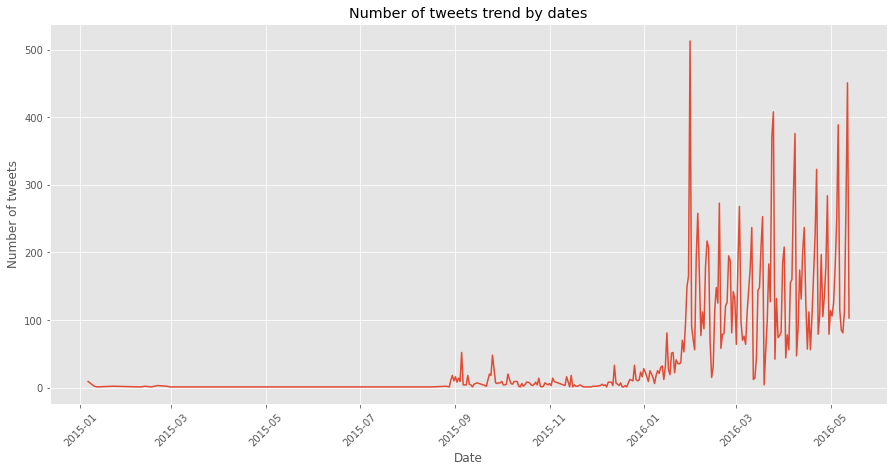

In [45]:
tweets_by_day = tweets_by_day.sort_values(by='date')
x = tweets_by_day['date']
y = tweets_by_day['name']
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.title('Number of tweets trend by dates')
plt.plot(x, y, label='Tweets trend by days')
plt.show()

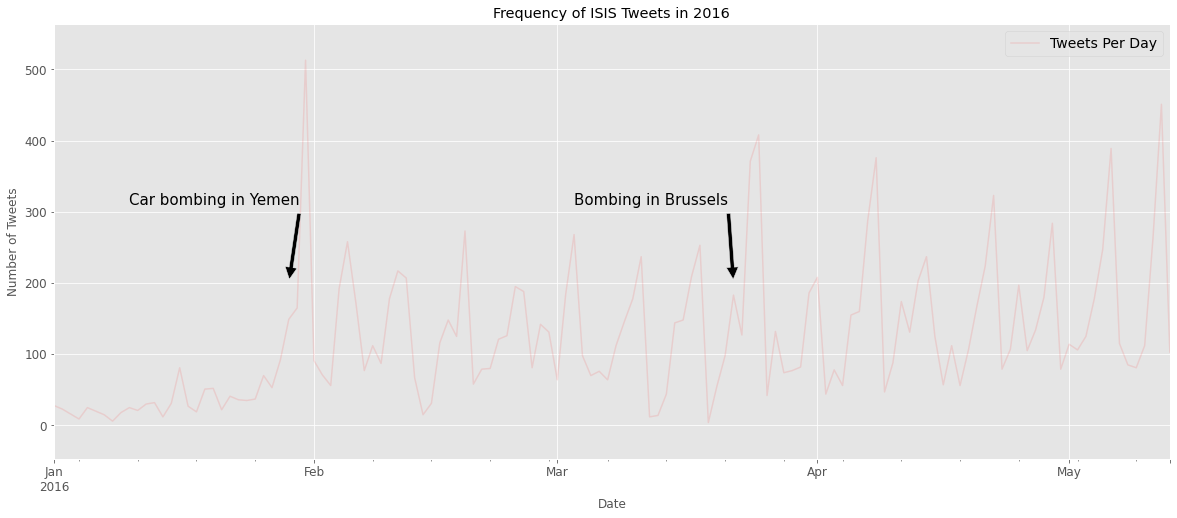

In [55]:
fig, ax = plt.subplots(figsize = (20,8))
perhr = dataset.set_index(dataset['time']).resample('D').count()
perhr['2016-01-01':].numberstatuses.interpolate(method='linear').plot(ax = ax, color="red", fontsize=12, alpha=0.1)


yemen = '2016-01-29'
brussels = '2016-03-22'


ax.annotate('Bombing in Brussels',xy=(brussels, 200),xytext=('2016-03-03', 310),
            arrowprops=dict(facecolor='black', shrink=0.05), size=15)

ax.annotate('Car bombing in Yemen',xy=(yemen, 200),xytext=('2016-01-10', 310),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15)

ax.margins(None,0.1)
ax.legend(['Tweets Per Day'], loc = 'upper right',
           numpoints = 1, labelspacing = 2.0, fontsize = 14)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.set_title('Frequency of ISIS Tweets in 2016')

plt.show()